In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [5]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [6]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [7]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
final_dataset['current_year'] = 2020

In [14]:
final_dataset['no_year'] = final_dataset['current_year'] - final_dataset['Year']

In [15]:
final_dataset.drop(['Year','current_year'], axis=1, inplace=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [17]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [19]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [20]:
import seaborn as sns

In [21]:
# sns.pairplot(final_dataset)

In [22]:
import matplotlib.pyplot as plt

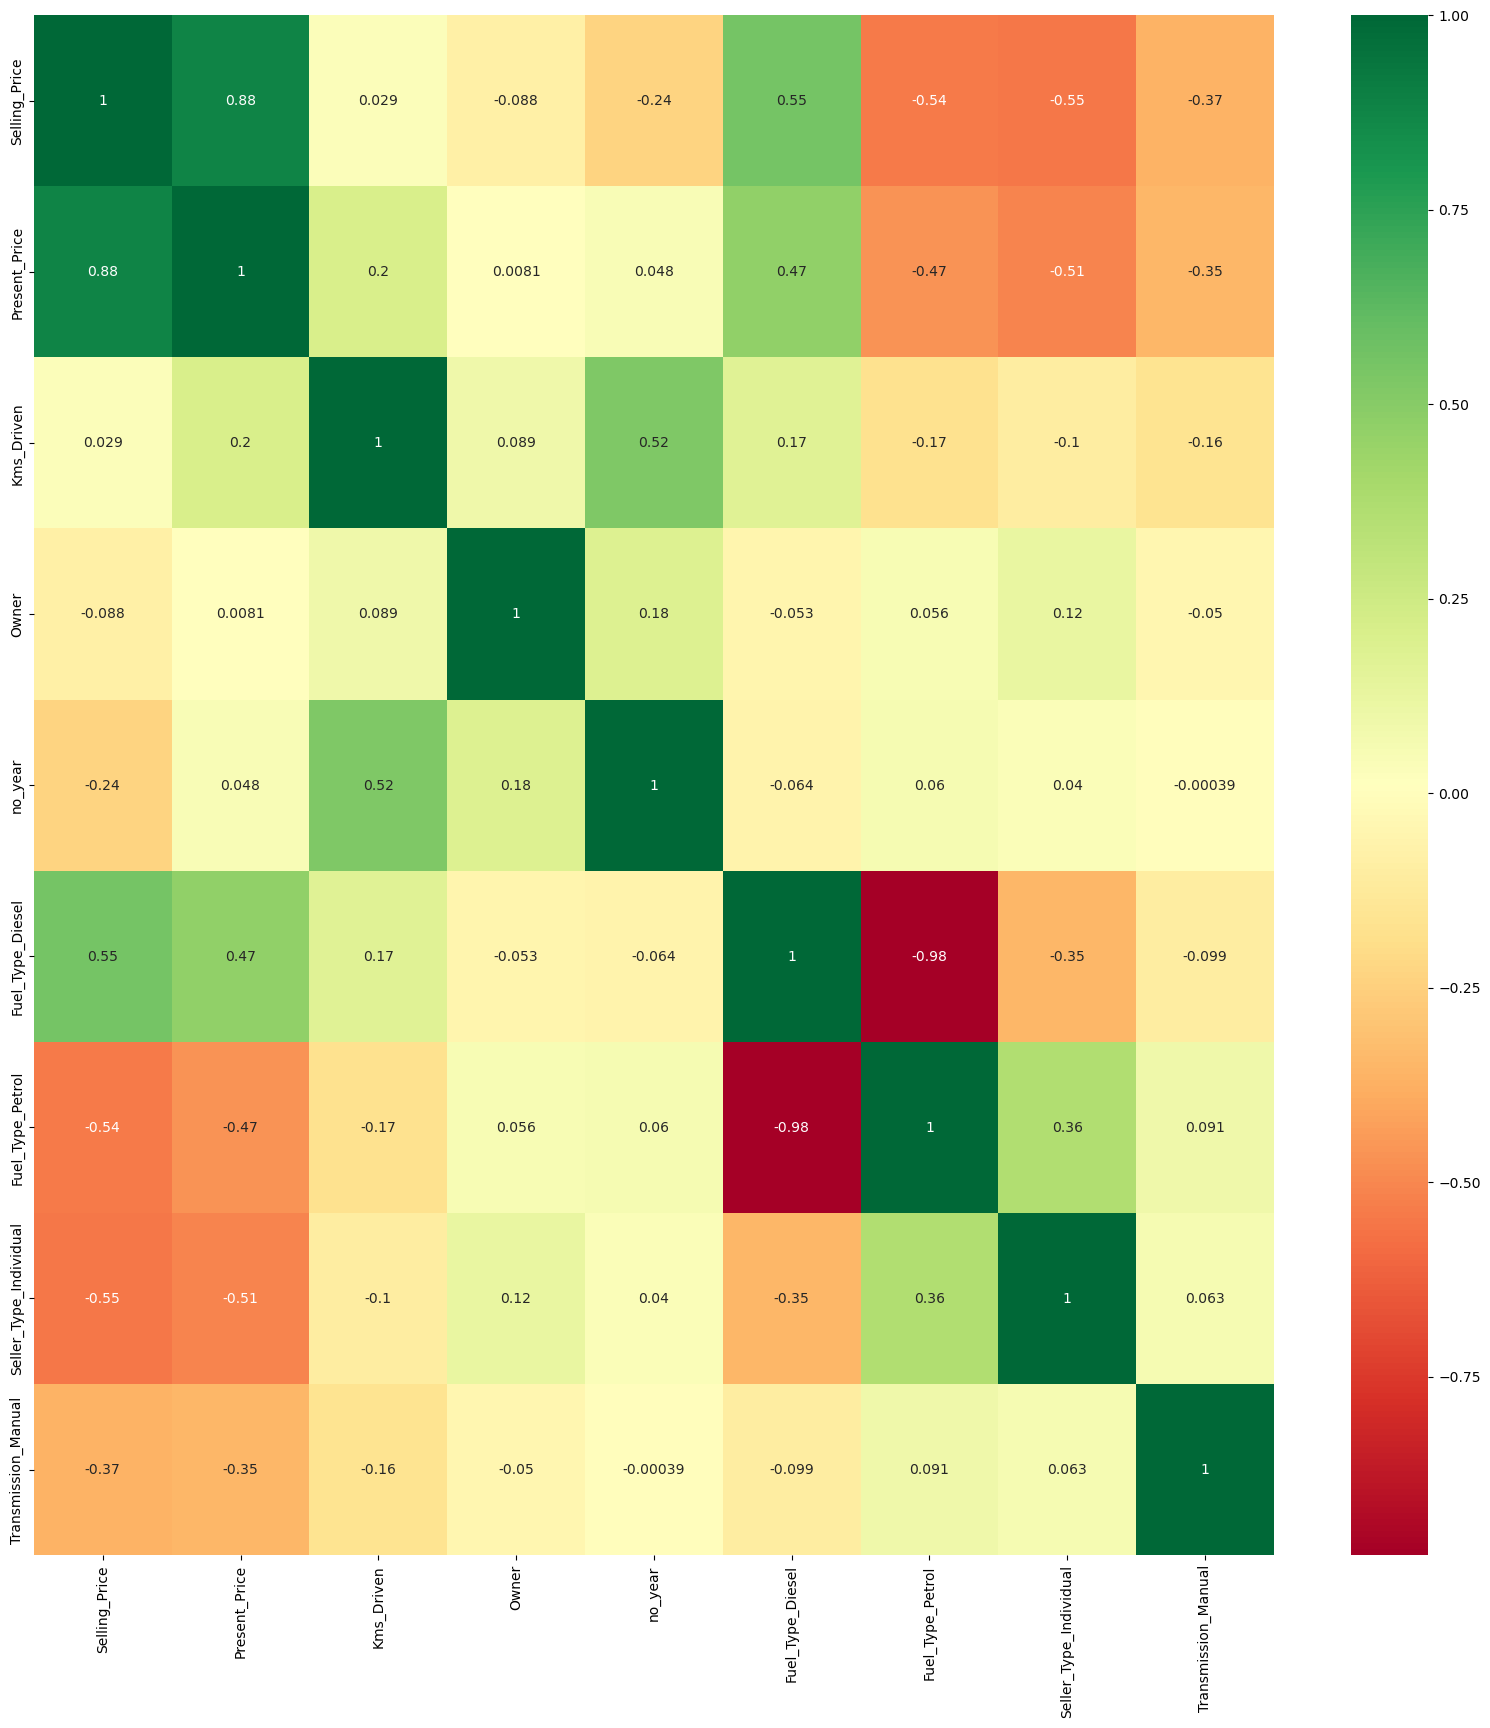

In [23]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [24]:
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [25]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [26]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [28]:
model.feature_importances_

array([0.36969097, 0.0459233 , 0.00041968, 0.07178046, 0.23102934,
       0.00986288, 0.13519294, 0.13610042])

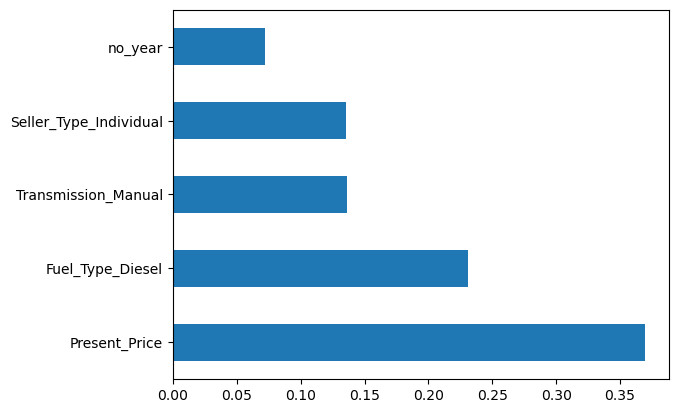

In [29]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape

(240, 8)

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
import numpy as np

In [35]:
#Hyperparameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
#Randomized Search CV

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#number of features to consider every split
max_features = ['auto','sqrt']

#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

#maxdepth.append(None)

#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#minimum number of samples required to each leaf node
min_samples_leaf = [1,2,5,10]

In [38]:
# create the random grid
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
rf_random = RandomizedSearchCV(
    estimator = RandomForestRegressor(),
    param_distributions = random_grid,
    scoring = 'neg_mean_squared_error',
    n_iter = 10,
    cv = 5,
    verbose = 2,
    random_state = 42,
    n_jobs = 1
)

In [41]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [57]:
pd.DataFrame(rf_random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.629209,0.341508,0.125193,0.020267,900,5,5,sqrt,10,"{'n_estimators': 900, 'min_samples_split': 5, ...",-5.076478,-2.662275,-9.433218,-3.768393,-12.029187,-6.593910,3.559433,7
1,2.056827,0.314498,0.125450,0.033372,1100,10,2,sqrt,15,"{'n_estimators': 1100, 'min_samples_split': 10...",-3.768558,-2.113226,-5.951648,-3.311724,-11.541071,-5.337245,3.341340,4
2,0.490003,0.062026,0.032402,0.009330,300,100,5,auto,15,"{'n_estimators': 300, 'min_samples_split': 100...",-7.649450,-4.053379,-9.227521,-7.320963,-8.551504,-7.360563,1.784733,9
3,0.631359,0.064220,0.035928,0.002781,400,5,5,auto,15,"{'n_estimators': 400, 'min_samples_split': 5, ...",-3.128317,-0.886165,-5.744988,-4.478899,-5.645280,-3.976730,1.812974,2
4,1.077761,0.278749,0.095185,0.042174,700,5,10,auto,20,"{'n_estimators': 700, 'min_samples_split': 5, ...",-5.229445,-3.417125,-10.199123,-4.748107,-10.241468,-6.767054,2.881425,8
5,1.765083,0.296131,0.103975,0.044409,1000,2,1,sqrt,25,"{'n_estimators': 1000, 'min_samples_split': 2,...",-2.200770,-1.074218,-3.877645,-2.846973,-10.730318,-4.145985,3.415625,3
6,1.798502,0.301344,0.134415,0.041378,1100,15,10,sqrt,5,"{'n_estimators': 1100, 'min_samples_split': 15...",-8.005820,-4.306651,-15.579929,-5.654235,-13.877286,-9.484784,4.474782,10
7,0.582732,0.099350,0.044592,0.017259,300,15,1,sqrt,15,"{'n_estimators': 300, 'min_samples_split': 15,...",-3.867068,-2.380371,-5.861265,-3.999361,-11.474166,-5.516446,3.177115,5
8,1.149392,0.171319,0.099175,0.029994,700,10,2,sqrt,5,"{'n_estimators': 700, 'min_samples_split': 10,...",-4.131607,-2.536636,-6.254732,-3.935291,-11.305163,-5.632686,3.075186,6
9,1.100191,0.157459,0.061489,0.010583,700,15,1,auto,20,"{'n_estimators': 700, 'min_samples_split': 15,...",-2.485986,-0.901522,-4.519299,-4.088220,-5.064368,-3.411879,1.521428,1


In [44]:
prediction = rf_random.predict(X_test)

In [45]:
prediction

array([ 4.43519311,  6.358824  ,  0.25029095,  3.68739659, 10.20762087,
        0.5620255 ,  4.20670467, 10.12603307,  0.24397055,  0.42681251,
        0.24110242,  4.55851766,  5.51838898,  5.41265171,  3.72412056,
        2.7741865 ,  2.49817455,  0.55507853,  5.19982601,  1.14546723,
        4.17408516,  1.1717429 ,  0.42884532, 14.85677883,  7.64785638,
       21.95568803,  1.14492938,  7.45478057,  5.60457354,  3.64147823,
        7.18463489,  2.87312175,  6.61220804,  0.40860651,  7.78789262,
        0.31192618,  4.59537589,  6.94523178,  5.62889891,  2.87312175,
        8.35579138,  4.53810675,  5.26140342,  0.55491268, 10.59771588,
        0.73757674,  2.79743123,  1.12880044,  4.22379313,  0.49009686,
        0.44384562,  8.9803858 ,  4.75169529,  3.00907896,  4.84740173,
        9.14588791,  3.33508028,  2.79652803,  0.55434382, 21.95568803,
       10.10632729])

In [62]:
y_test

75      3.95
33      6.00
191     0.20
35      2.95
211    11.75
       ...  
271     3.00
24      2.90
144     0.60
62     18.75
258     8.40
Name: Selling_Price, Length: 61, dtype: float64

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

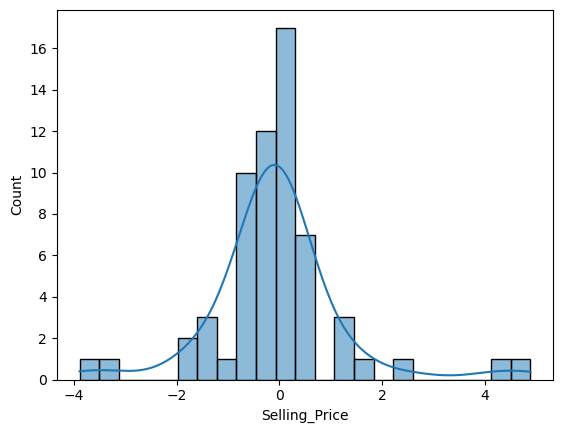

In [46]:
sns.histplot(y_test-prediction,kde=True)

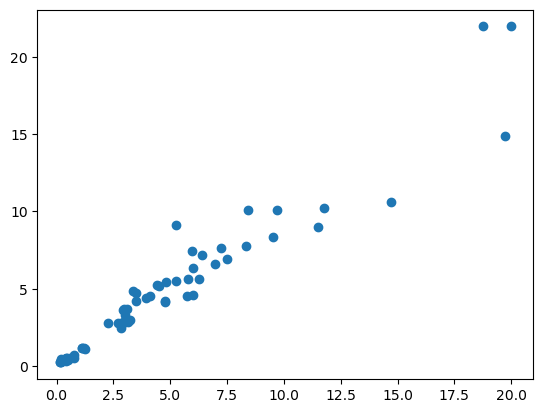

In [47]:
plt.scatter(y_test,prediction)

In [48]:
# import pickle

# # open a file, where you want to store the data
# file = open('random_forest_regression_model.pkl','wb')

# #dump information to that file
# pickle.dump(rf_random,file)

# #close the file
# file.close()

In [49]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [55]:
rf_random.best_score_

-3.4118788853911637

In [52]:
X_test.iloc[0,]

Present_Price                 6.8
Kms_Driven                36000.0
Owner                         0.0
no_year                       5.0
Fuel_Type_Diesel              0.0
Fuel_Type_Petrol              1.0
Seller_Type_Individual        0.0
Transmission_Manual           1.0
Name: 75, dtype: float64

In [54]:
rf_random.predict(X_test.iloc[0:2,])

array([4.43519311, 6.358824  ])

In [63]:
y_test.iloc[0:2]

75    3.95
33    6.00
Name: Selling_Price, dtype: float64